<a href="https://colab.research.google.com/github/koroteevmv/ML_course/blob/main/ML2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

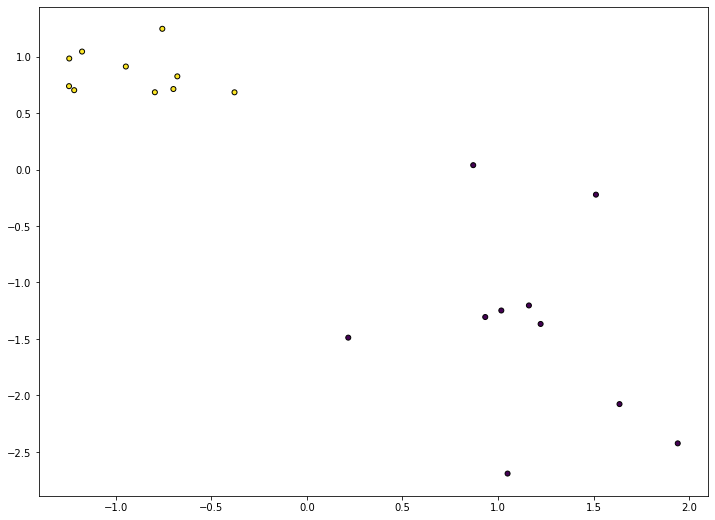

In [21]:
from sklearn.datasets import make_classification
X, Y = make_classification( n_features=2, n_redundant=0, n_informative=2, n_samples=20,
                           n_clusters_per_class=1, random_state=7
)
plt.figure(figsize=(12, 9))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()

In [48]:
X = X.T

In [109]:
X

array([[-1.24226772,  0.87046494,  1.63551216, -1.17524944, -0.9462694 ,
         1.01743287, -0.79447272, -0.67702168,  1.05011594, -0.69757676,
         1.22290675, -1.24351642,  0.21694237,  1.51224037, -0.37800299,
         0.93331463,  1.16169367, -1.21641228, -0.75555662,  1.94004697],
       [ 0.98372215,  0.03911246, -2.07676447,  1.04522329,  0.9127419 ,
        -1.24797582,  0.68485195,  0.82551772, -2.69209777,  0.71334588,
        -1.36723201,  0.7387514 , -1.48836945, -0.22199517,  0.68426186,
        -1.30582287, -1.20324146,  0.70319151,  1.2467747 , -2.42471234]])

In [ ]:
x = np.array([1.46, 1.13, -2.30, 1.74, 0.04, 
    -0.61, 0.32, -0.76, 0.58, -1.10, 
     0.87, 1.62, -0.53, -0.25, -1.07, 
    -0.38, -0.17, -0.32, -2.06, -0.88, ])

In [ ]:
y = np.array([101.16, 78.44, -159.24, 120.72, 2.92, 
    -42.33, 22.07, -52.67, 40.32, -76.10, 
     59.88, 112.38, -36.54, -17.25, -74.24, 
    -26.57, -11.93, -22.31, -142.54, -60.74,])

In [106]:
class hypothesis(object):
    """Модель логистической регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
        self.b2 = 1
    def predict(self, x):
        x1, x2 = x
        z = self.b0 + self.b1 * x1 + self.b2 * x2
        return 1 / (1 + np.exp(-z))
    def error(self, X, Y):
        return -sum(Y * np.log2(self.predict(X)) + (1 - Y) *(1 - np.log2(self.predict(X)))) / len(X[0])
    def BGD(self, X, Y):  
        alpha = 0.5
        for _ in range(1000):
          dJ0 = sum(self.predict(X) - Y) /len(X)
          dJ1 = sum((self.predict(X) - Y) * X[0]) /len(X[0])
          dJ2 = sum((self.predict(X) - Y) * X[1]) /len(X[0])
          self.b0 -= alpha * dJ0
          self.b1 -= alpha * dJ1
          self.b2 -= alpha * dJ2

In [113]:
hyp = hypothesis()
print(hyp.predict((0, 0)))
J = hyp.error(X, Y)
print("initial error:", J)
hyp.BGD(X, Y)
J = hyp.error(X, Y)
print("error after gradient descent:", J)

0.5
initial error: -1.4495454090399034
error after gradient descent: -7.8762626938368445


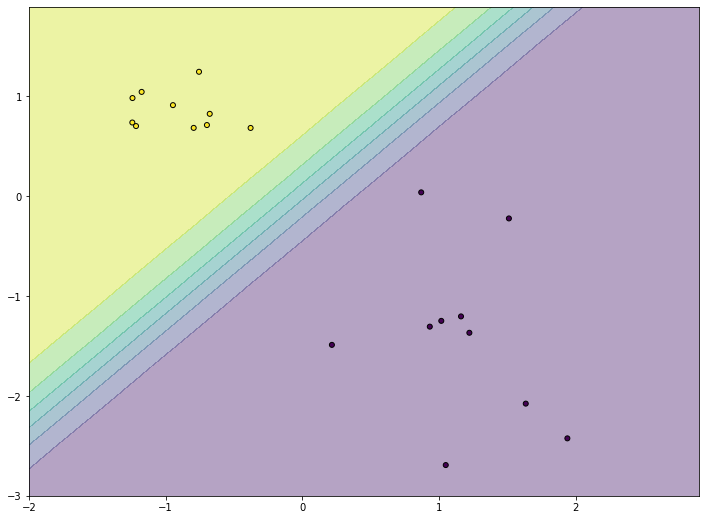

In [114]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(-2, 3, 0.1), np.arange(-3, 2, 0.1))
Z = hyp.predict((xx, yy))
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.T[:, 0], X.T[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()

In [117]:
from sklearn import linear_model

X = X.T

reg = linear_model.LogisticRegression()
reg.fit(X, Y)
print(reg.score(X, Y))

1.0


In [120]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = reg.predict(X)
print("Коэффициенты: \n", reg.coef_)
print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(Y, y_pred))
print("Коэффициент детерминации: %.2f" % r2_score(Y, y_pred))

Коэффициенты: 
 [[-1.37021215  1.21891045]]
Среднеквадратичная ошибка: 0.00
Коэффициент детерминации: 1.00


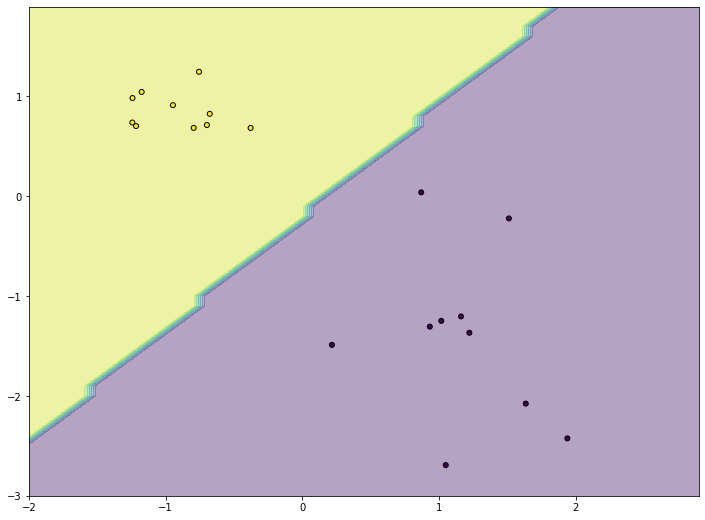

In [125]:

xx, yy = np.meshgrid(np.arange(-2, 3, 0.1), np.arange(-3, 2, 0.1))
Z = reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 9))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 0], X[:, 1], marker="o", c=Y, s=25, edgecolor="k")
plt.show()